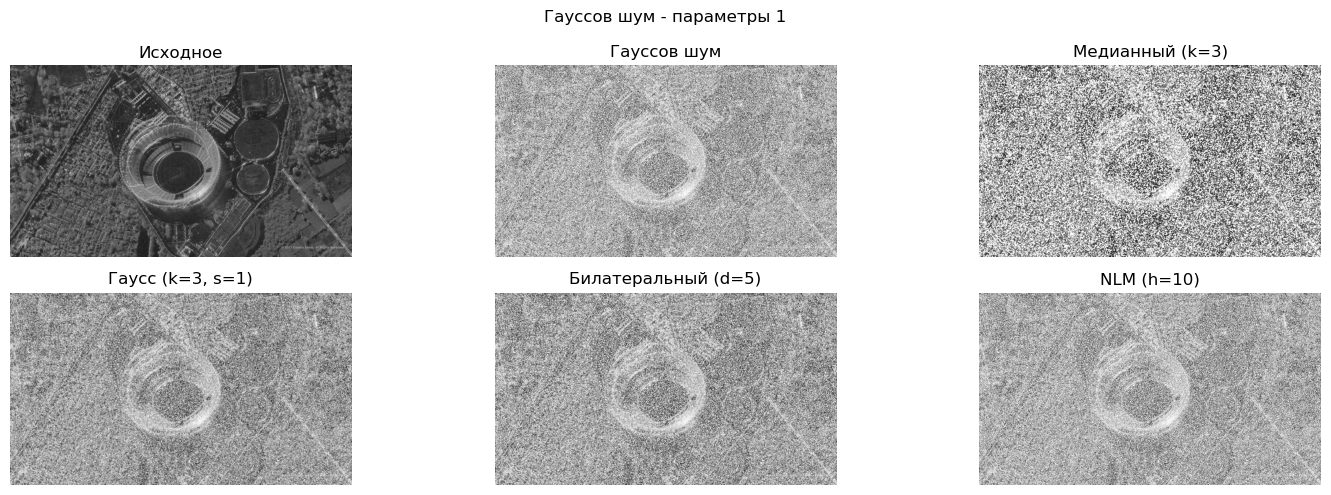

Параметры 1 - Гауссов шум:
  Медианный: 27.56
  Гаусс: 27.85
  Билатеральный: 27.63
  NLM: 28.10



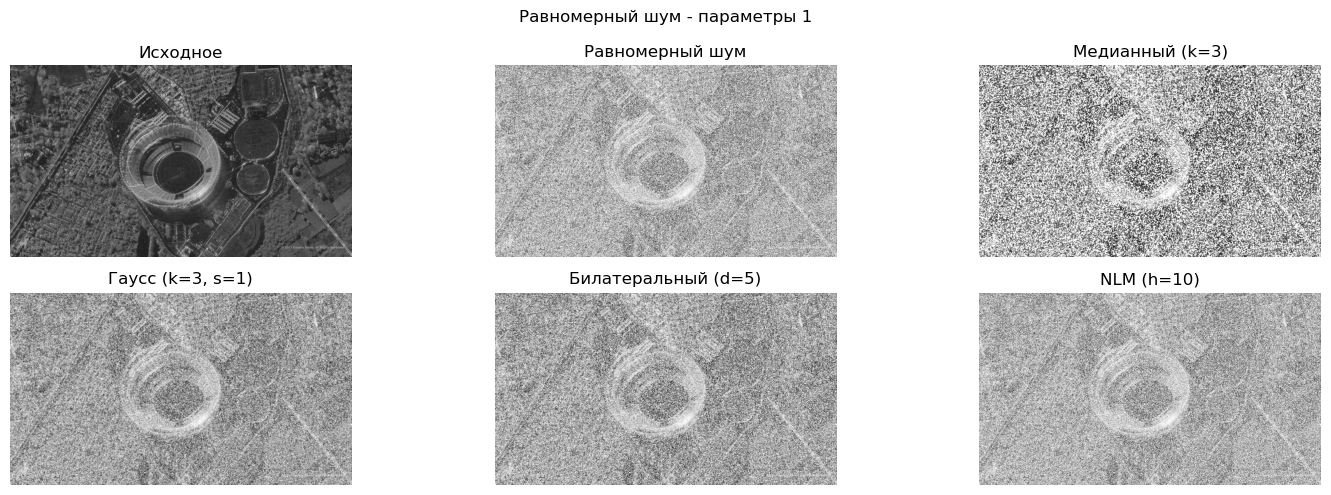

Параметры 1 - Равномерный шум:
  Медианный: 27.50
  Гаусс: 27.89
  Билатеральный: 27.61
  NLM: 27.87



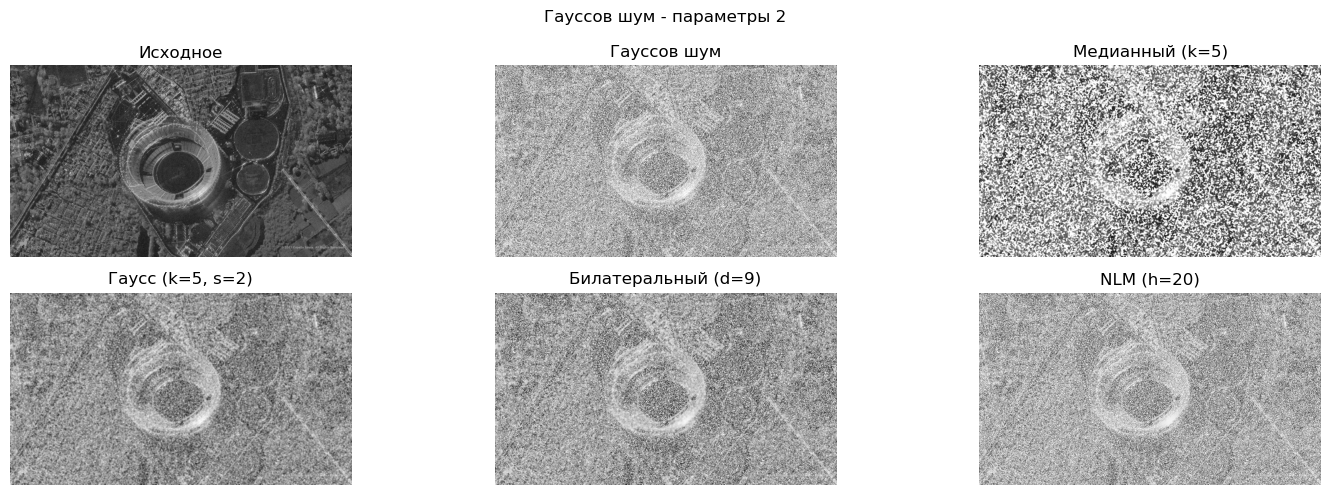

Параметры 2 - Гауссов шум:
  Медианный: 27.53
  Гаусс: 27.84
  Билатеральный: 27.62
  NLM: 28.10



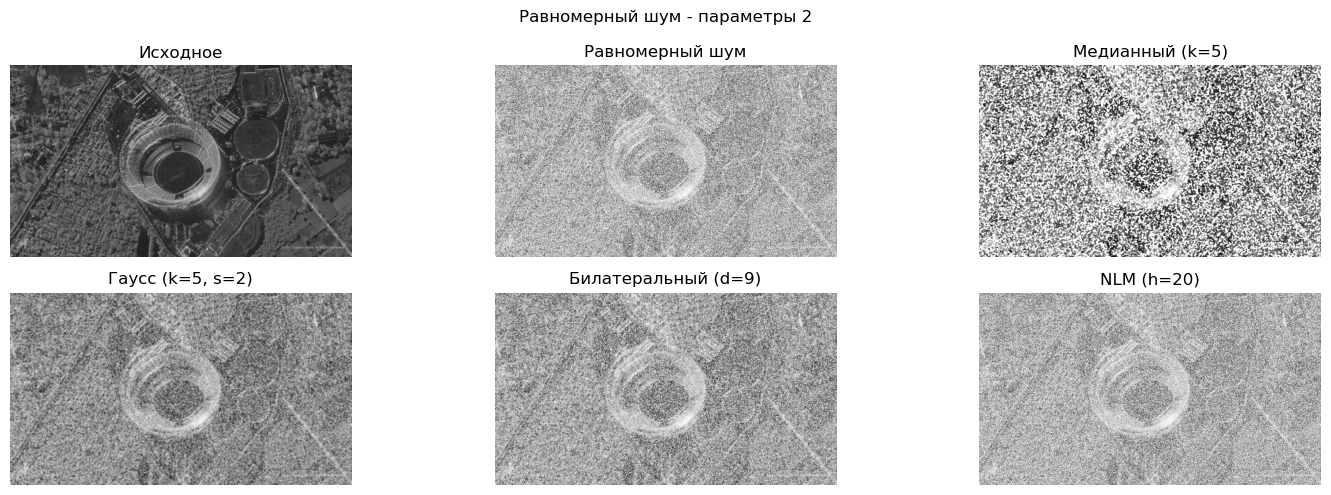

Параметры 2 - Равномерный шум:
  Медианный: 27.51
  Гаусс: 27.93
  Билатеральный: 27.59
  NLM: 27.87



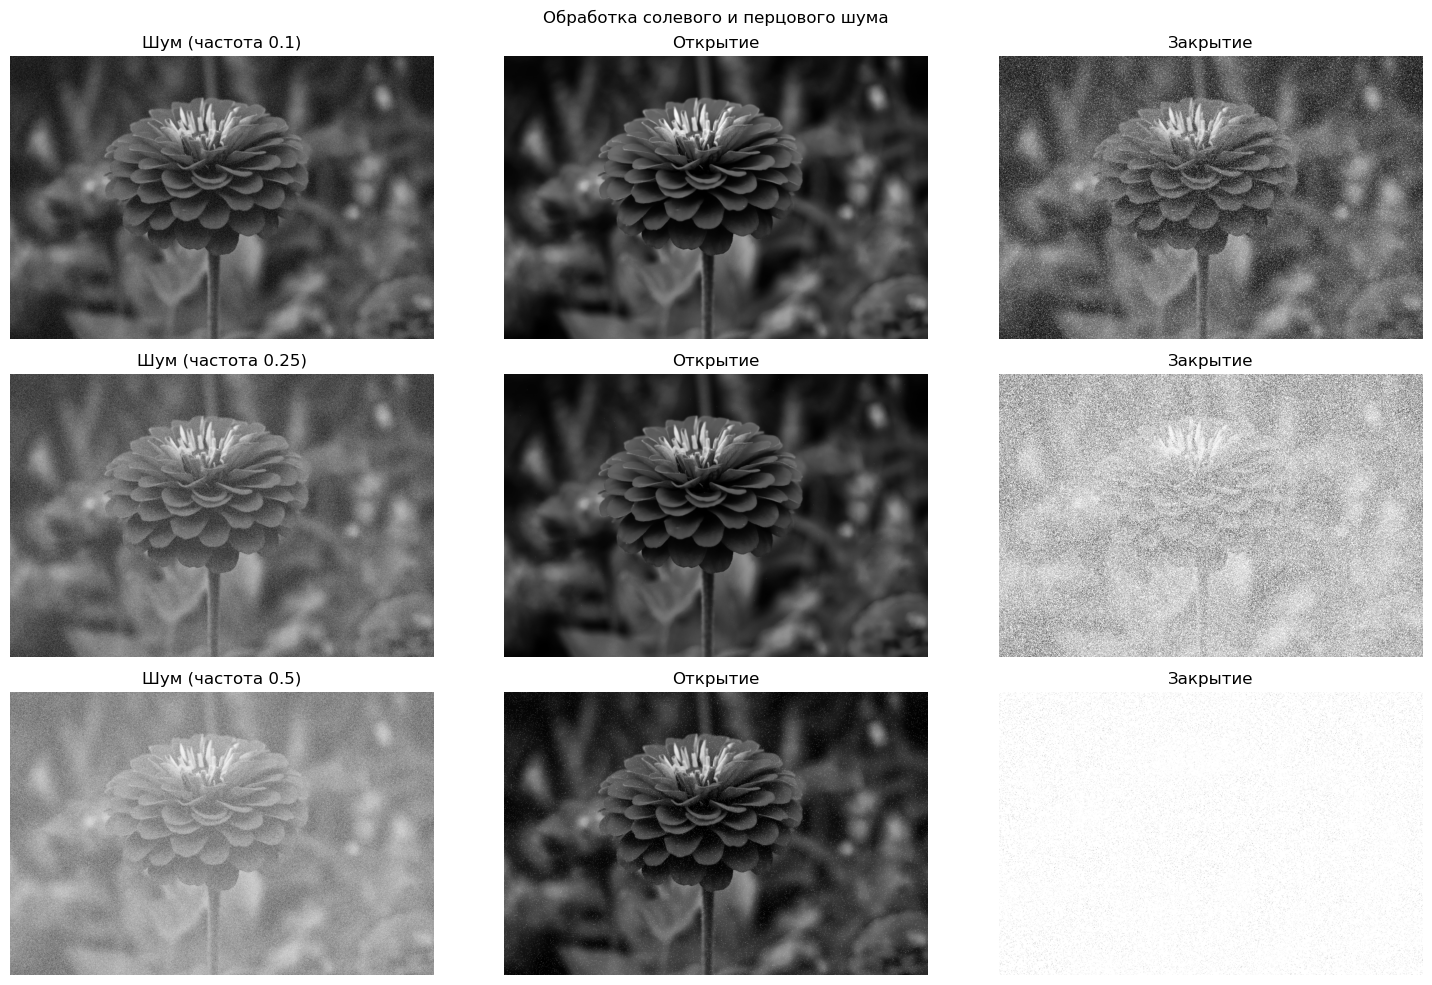

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    return 20 * np.log10(255.0 / np.sqrt(mse))

img = cv2.imread('sar_1.jpg', cv2.IMREAD_GRAYSCALE)

gauss_noise = np.random.normal(0, 25, img.shape).astype(np.uint8)
img_gauss = cv2.add(img, gauss_noise)

uniform_noise = np.random.uniform(-50, 50, img.shape).astype(np.uint8)
img_uniform = cv2.add(img, uniform_noise)

kernels = [3, 5]
sigmas = [1, 2]
d_params = [5, 9]
h_params = [10, 20]

for i in range(2):
    k = kernels[i]
    s = sigmas[i]
    d = d_params[i]
    h = h_params[i]
    
    med_gauss = cv2.medianBlur(img_gauss, k)
    gauss_gauss = cv2.GaussianBlur(img_gauss, (k, k), s)
    bilateral_gauss = cv2.bilateralFilter(img_gauss, d, 75, 75)
    nlm_gauss = cv2.fastNlMeansDenoising(img_gauss, None, h, 7, 21)
    
    med_uniform = cv2.medianBlur(img_uniform, k)
    gauss_uniform = cv2.GaussianBlur(img_uniform, (k, k), s)
    bilateral_uniform = cv2.bilateralFilter(img_uniform, d, 75, 75)
    nlm_uniform = cv2.fastNlMeansDenoising(img_uniform, None, h, 7, 21)
    
    plt.figure(figsize=(15, 5))
    images_gauss = [img, img_gauss, med_gauss, gauss_gauss, bilateral_gauss, nlm_gauss]
    titles_gauss = ['Исходное', 'Гауссов шум', 
                   f'Медианный (k={k})', f'Гаусс (k={k}, s={s})',
                   f'Билатеральный (d={d})', f'NLM (h={h})']
    
    for j in range(6):
        plt.subplot(2, 3, j+1)
        plt.imshow(images_gauss[j], cmap='gray')
        plt.title(titles_gauss[j])
        plt.axis('off')
    
    plt.suptitle(f'Гауссов шум - параметры {i+1}')
    plt.tight_layout()
    plt.show()
    
    print(f"Параметры {i+1} - Гауссов шум:")
    print(f"  Медианный: {psnr(img, med_gauss):.2f}")
    print(f"  Гаусс: {psnr(img, gauss_gauss):.2f}")
    print(f"  Билатеральный: {psnr(img, bilateral_gauss):.2f}")
    print(f"  NLM: {psnr(img, nlm_gauss):.2f}")
    print()
    
    plt.figure(figsize=(15, 5))
    images_uniform = [img, img_uniform, med_uniform, gauss_uniform, bilateral_uniform, nlm_uniform]
    titles_uniform = ['Исходное', 'Равномерный шум', 
                     f'Медианный (k={k})', f'Гаусс (k={k}, s={s})',
                     f'Билатеральный (d={d})', f'NLM (h={h})']
    
    for j in range(6):
        plt.subplot(2, 3, j+1)
        plt.imshow(images_uniform[j], cmap='gray')
        plt.title(titles_uniform[j])
        plt.axis('off')
    
    plt.suptitle(f'Равномерный шум - параметры {i+1}')
    plt.tight_layout()
    plt.show()
    
    print(f"Параметры {i+1} - Равномерный шум:")
    print(f"  Медианный: {psnr(img, med_uniform):.2f}")
    print(f"  Гаусс: {psnr(img, gauss_uniform):.2f}")
    print(f"  Билатеральный: {psnr(img, bilateral_uniform):.2f}")
    print(f"  NLM: {psnr(img, nlm_uniform):.2f}")
    print()

img2 = cv2.imread('cells_2.jpg', cv2.IMREAD_GRAYSCALE)

frequencies = [0.1, 0.25, 0.5]
kernel = np.ones((3, 3), np.uint8)

plt.figure(figsize=(15, 10))

for i, freq in enumerate(frequencies):
    noise_mask = np.random.choice([0, 255], size=img2.shape, p=[1-freq, freq])
    img_noisy = cv2.add(img2, noise_mask.astype(np.uint8))
    
    opening = cv2.morphologyEx(img_noisy, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(img_noisy, cv2.MORPH_CLOSE, kernel)
    
    plt.subplot(3, 3, i*3 + 1)
    plt.imshow(img_noisy, cmap='gray')
    plt.title(f'Шум (частота {freq})')
    plt.axis('off')
    
    plt.subplot(3, 3, i*3 + 2)
    plt.imshow(opening, cmap='gray')
    plt.title('Открытие')
    plt.axis('off')
    
    plt.subplot(3, 3, i*3 + 3)
    plt.imshow(closing, cmap='gray')
    plt.title('Закрытие')
    plt.axis('off')

plt.suptitle('Обработка солевого и перцового шума')
plt.tight_layout()
plt.show()